<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/K-Means_Clustering_Tutorial/K_Means_Clustering_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction





# Import libraries


In [116]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.



### Load Data From CSV File  
Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.

In [71]:
from google.colab import drive
drive.mount('/content/drive')

cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [72]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __standardScaler()__ to normalize our dataset.

In [86]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509, -0.53305503],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677,  1.53588001],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385, -0.53305503],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281, -0.53305503],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745, -0.53305503],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 ,  1.53588001]])

### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [87]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

### Insights
We assign the labels to each row in dataframe.

In [88]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.

In [89]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, lets look at the distribution of customers based on their age and income:

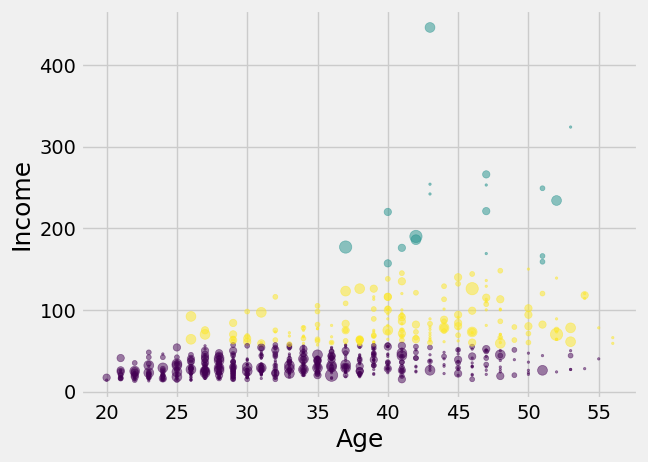

In [91]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)

plt.show()

In [95]:
print(X[:5])
print(labels[:5])


[[4.100e+01 2.000e+00 6.000e+00 1.900e+01 1.240e-01 1.073e+00 0.000e+00
  6.300e+00 0.000e+00]
 [4.700e+01 1.000e+00 2.600e+01 1.000e+02 4.582e+00 8.218e+00 0.000e+00
  1.280e+01 1.000e+00]
 [3.300e+01 2.000e+00 1.000e+01 5.700e+01 6.111e+00 5.802e+00 1.000e+00
  2.090e+01 0.000e+00]
 [2.900e+01 2.000e+00 4.000e+00 1.900e+01 6.810e-01 5.160e-01 0.000e+00
  6.300e+00 0.000e+00]
 [4.700e+01 1.000e+00 3.100e+01 2.530e+02 9.308e+00 8.908e+00 0.000e+00
  7.200e+00 2.000e+00]]
[0 2 0 0 1]


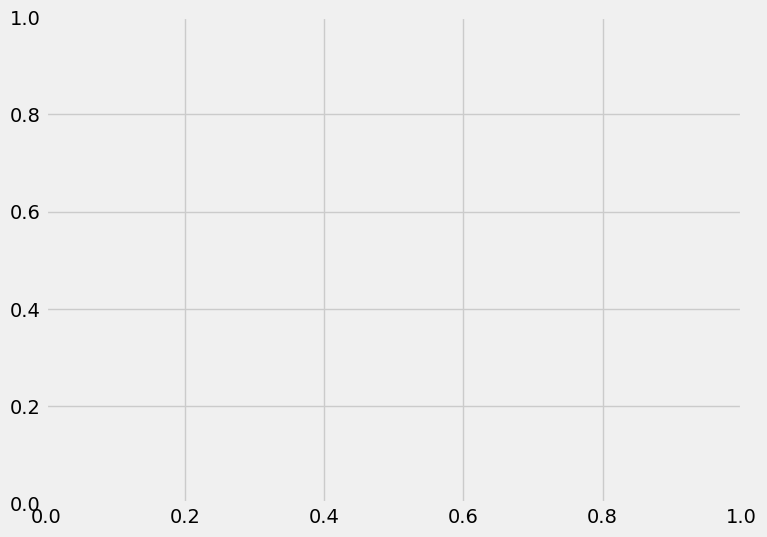

In [110]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float64))


#### setting value for k

In [111]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

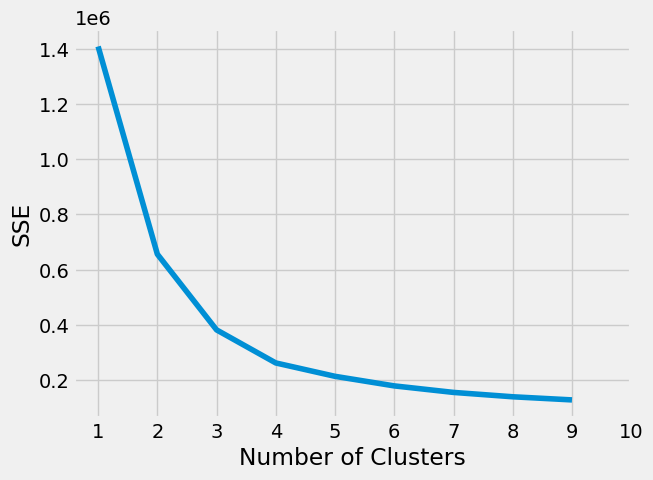

In [112]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [113]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.6857330863928892,
 0.5617780136502785,
 0.4779906763136053,
 0.3662857783534899,
 0.3615383113523907,
 0.34567245037789535,
 0.2585592092885024,
 0.27008698283239735]

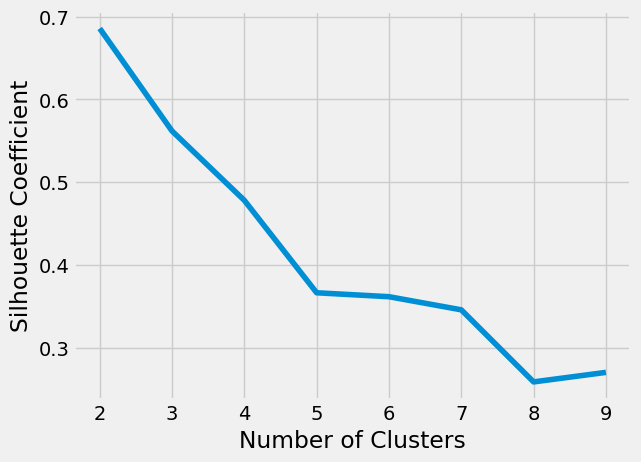

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Task A: Iris data

Perform K-Means clustering on the dataset, iris.csv (from the UCI Machine Learning Repository). Before using the data for clustering, you might have to remove a few columns because the K-Means algorithm involves the calculation of Euclidian distance. You can choose various values of K; however, you must also choose K = 3 in this case. Upon clustering at K = 3, check how much similar your three clusters are as compared to the labels of species – setosa, versicolour, and verginica.

In [140]:
iris = pd.read_csv("/content/Unit06 iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
# Replace missing values in numeric columns with the mean
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    if iris[column].isnull().any():
        mean_value = iris[column].mean()
        iris[column].fillna(mean_value, inplace=True)

# Assuming 'species' is a categorical column, you can replace missing values with the mode
if iris['species'].isnull().any():
    mode_value = iris['species'].mode()[0]
    iris['species'].fillna(mode_value, inplace=True)

# Now proceed with preprocessing for clustering

# Preprocess the data
X = iris.drop('species', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [142]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


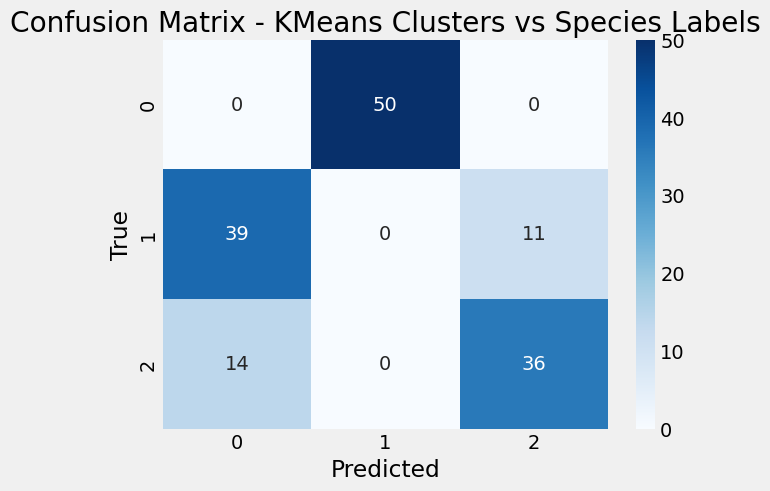

In [144]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)  # Set n_init to suppress warning
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
iris['cluster'] = clusters

# Map species names to numbers and handle unmapped species
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_num'] = iris['species'].map(species_to_num)

# Check for any unmapped species
if iris['species_num'].isnull().any():
    print("There are unmapped species names")
    # Handle unmapped species names

# Create a confusion matrix
conf_mat = confusion_matrix(iris['species_num'], iris['cluster'])
print(conf_mat)
# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KMeans Clusters vs Species Labels')
plt.show()

The resulting Iris dataset contains three species, coded as:

0: Iris Setosa
1: Iris Versicolor
2: Iris Virginica

Assuming the same coding is used here, the confusion matrix can be interpreted as follows:

*   First Row (True Setosa): All 50 instances of the true Setosa species were predicted to be in the second cluster (middle column). This implies that the model did not correctly identify any Setosa species.

*   Second Row (True Versicolor): For the true Versicolor species, 39 instances were predicted to be in the first cluster, and 11 instances were predicted to be in the third cluster. None were correctly identified as Versicolor (second cluster).

*   Third Row (True Virginica): For the true Virginica species, 14 instances were incorrectly grouped into the first cluster, while 36 were correctly identified in the third cluster.

Thus, the clustering model successfully grouped most of the Virginica species correctly but failed to correctly identify the Setosa and Versicolor species, misclassifying them into other clusters. Note that the color intensity and the numbers in the heatmap cells indicate how many instances of each true species were predicted in each cluster.

# Task B: Wine data
Perform K-Means clustering on the dataset, wine.csv (from the UCI Machine Learning Repository). Before using the data for clustering, you might have to remove a few columns like in the previous task. You can choose various values of K; however, you must also choose K = 3 in this case. Upon clustering at K = 3, check how much similar your three clusters are as compared to the labels of wines – 1, 2, and 3

In [165]:
wine_data = pd.read_csv("/content/Unit06 wine.csv")
wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


     Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127     2.80        3.06   
1      13.20        1.78  2.14  11.2  100     2.65        2.76   
2      13.16        2.36  2.67  18.6  101     2.80        3.24   
3      14.37        1.95  2.50  16.8  113     3.85        3.49   
4      13.24        2.59  2.87  21.0  118     2.80        2.69   
..       ...         ...   ...   ...  ...      ...         ...   
173    13.71        5.65  2.45  20.5   95     1.68        0.61   
174    13.40        3.91  2.48  23.0  102     1.80        0.75   
175    13.27        4.28  2.26  20.0  120     1.59        0.69   
176    13.17        2.59  2.37  20.0  120     1.65        0.68   
177    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  cluster  \
0                    0.28     2.29       5.64  1.04  3.92     1065        1   
1                    0.26     1.28       4.38  1.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


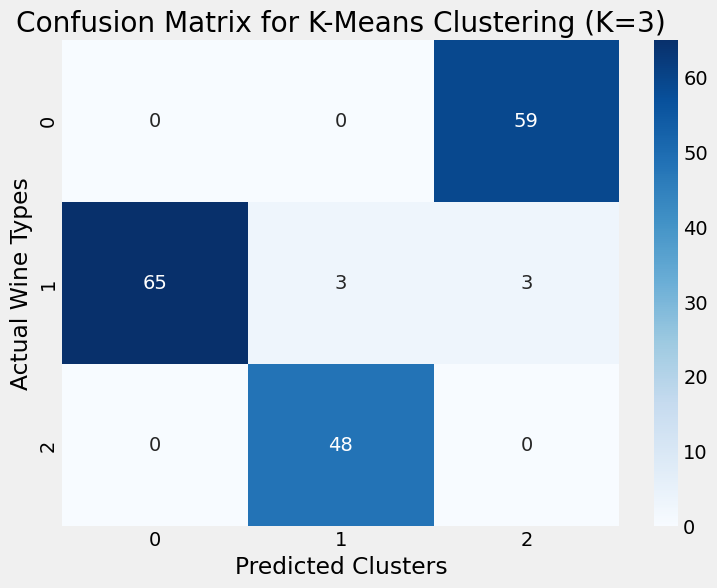

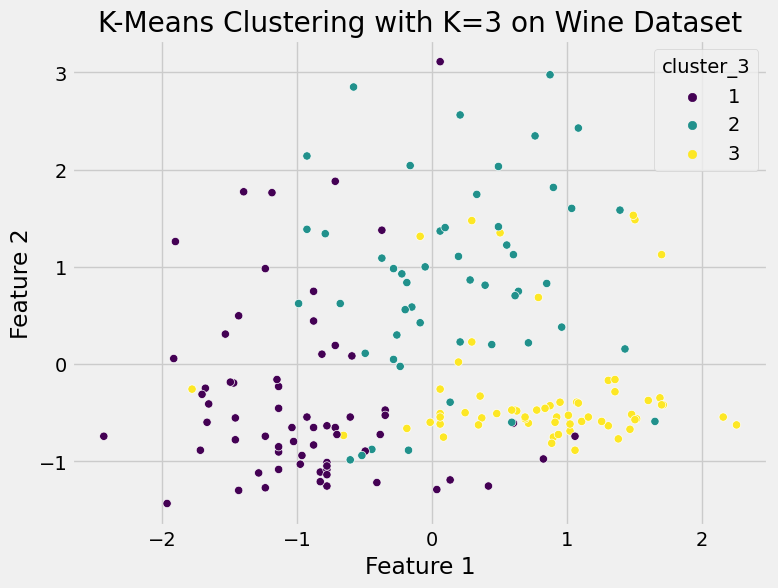

In [174]:
X = wine_data.drop(columns=['Wine'])
print(X)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering for K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(X_scaled)
wine_data['cluster_3'] = clusters_3 + 1  # Adjusting cluster labels to match wine types

# Create and Plot Confusion Matrix
conf_mat_3 = confusion_matrix(wine_data['Wine'], wine_data['cluster_3'])
print(conf_mat_3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Means Clustering (K=3)')
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Wine Types')
plt.show()

#Visualize Clustering Results:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=wine_data['cluster_3'], palette='viridis')
plt.title('K-Means Clustering with K=3 on Wine Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Confusion Matrix Interpretation**

* First Row (Wine Type 1): All 59 instances of Wine Type 1 were correctly classified into Cluster 2.

* Second Row (Wine Type 2): For Wine Type 2, 65 instances were correctly classified into Cluster 3, but 3 instances were incorrectly classified into each of Cluster 1 and Cluster 2.

* Third Row (Wine Type 3): All 48 instances of Wine Type 3 were incorrectly classified into Cluster 1.

This confusion matrix suggests:

The clustering model accurately identified all instances of Wine Type 1.
It mostly correctly classified Wine Type 2, with some instances misclassified.
It completely misclassified Wine Type 3, grouping all instances into a single cluster.
The clustering results indicate that while the K-Means model was effective in differentiating Wine Type 1 from the others, it struggled to distinguish between Wine Types 2 and 3. This outcome might be due to similar characteristics shared between these two types that are not as distinct as those of Wine Type 1, or it could reflect limitations in the clustering algorithm or the features used for clustering.

# Task C: WeatherAUS data

Perform K-Means clustering on the dataset, weatherAUS.csv (from the Kaggle site). The details about this data can be found here. Again, you will have to remove a few columns from this data and make it useful for clustering. Play with a range of values of K, from, K=2 to K=6 and try to visualise the results of clustering using two-dimensional scatter plots.

In [147]:
weather = pd.read_csv("/content/Unit06 weatherAUS.csv")
weather.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Here's a brief overview of its columns:

* MinTemp: Minimum temperature in degrees Celsius.
* MaxTemp: Maximum temperature in degrees Celsius.
* Rainfall: Amount of rainfall in mm.
* WindGustSpeed: Speed of the strongest wind gust in the day in km/h.
* WindSpeed9am: Wind speed in km/h at 9 AM.
* WindSpeed3pm: Wind speed in km/h at 3 PM.
* Humidity9am: Humidity in percentage at 9 AM.
* Humidity3pm: Humidity in percentage at 3 PM.
* Pressure9am: Atmospheric pressure in hPa at 9 AM.
* Pressure3pm: Atmospheric pressure in hPa at 3 PM.
* Temp9am: Temperature in degrees Celsius at 9 AM.
* Temp3pm: Temperature in degrees Celsius at 3 PM.
* RainToday: Indicates if it rained today (Yes or No).
* RainTomorrow: Indicates if it will rain tomorrow (Yes or No).

In [154]:
# Assume weather_data is your preprocessed DataFrame
# Select numerical columns (or preprocess to make them numerical)
numeric_weather_data = weather.select_dtypes(include=[np.number])
numeric_weather_data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

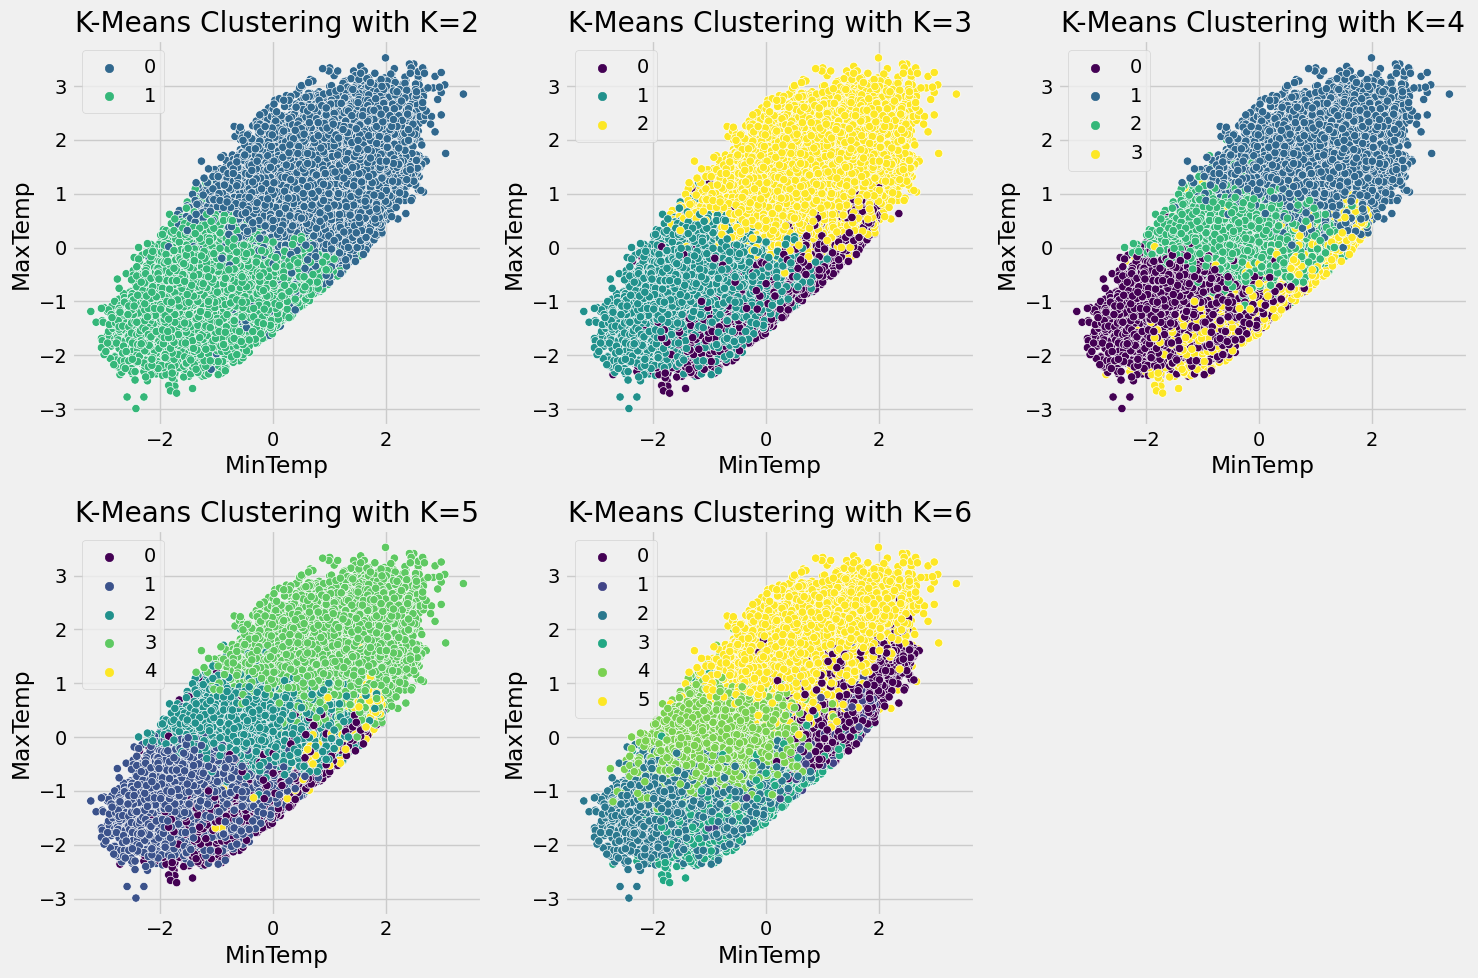

In [157]:
# Dropping non-numeric columns for simplicity in clustering
numeric_weather_data = numeric_weather_data.select_dtypes(include=[np.number])

# Drop rows with any missing values
numeric_weather_data = numeric_weather_data.dropna()

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_weather_data)

# Perform K-Means clustering for K values from 2 to 6
plt.figure(figsize=(15, 10))
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Using the first two numeric columns for a 2D scatter plot
    plt.subplot(2, 3, k-1)
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis')
    plt.title(f'K-Means Clustering with K={k}')
    plt.xlabel(numeric_weather_data.columns[0])
    plt.ylabel(numeric_weather_data.columns[1])

plt.tight_layout()
plt.show()